# Limpieza de Datos de visitas19

### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura del archivo visitas.csv

In [2]:
dataframe_general= pd.read_csv('visita19.csv')

### Selección de columnas

In [3]:
predataframe1=dataframe_general.iloc [:, [1,4,5,11,13,17,18,19,21]]
predaraframe2=dataframe_general.iloc [:, 23:66] 
dataframe_seleccion= pd.concat([predataframe1,predaraframe2], axis=1)

### Proceso de limpieza de datos

In [4]:
#Para VISIT_ANIO
aux=dataframe_seleccion['VISIT_ANIO,C,2'].dropna()
dataframe_seleccion['VISIT_ANIO,C,2'].fillna(round(aux.mean()), inplace=True)
#Para MEDIO_2
aux=dataframe_seleccion['MEDIO_2,C,2'].dropna()
dataframe_seleccion['MEDIO_2,C,2'].fillna(round(aux.mean()), inplace=True)
#Para TAM_GRUPO
aux=dataframe_seleccion['TAM_GRUPO,C,3'].dropna()
dataframe_seleccion['TAM_GRUPO,C,3'].fillna(round(aux.mean()), inplace=True)
#Para MENORES
aux=dataframe_seleccion['MENORES_12,C,3'].dropna()
dataframe_seleccion['MENORES_12,C,3'].fillna(round(aux.mean()), inplace=True)
#Para NIV_APREND
aux=dataframe_seleccion['NIV_APREND,C,2'].dropna()
dataframe_seleccion['NIV_APREND,C,2'].fillna(round(aux.mean()), inplace=True)
#print(dataframe_seleccion.isnull().sum())

### Visualización de algunos datos estadisticos

In [5]:
dataframeDatosDescriptivos= dataframe_seleccion.describe()
print(dataframeDatosDescriptivos)

       ENT_REGIS,C,2     SEXO,N,1,0     EDAD,N,2,0  ESCOLARIDA,N,2,0  \
count  186125.000000  186125.000000  186125.000000     186125.000000   
mean       15.064296       1.531696      34.479807          8.270705   
std         7.848750       0.498996      15.614473          7.885245   
min         1.000000       1.000000      12.000000          1.000000   
25%         9.000000       1.000000      22.000000          7.000000   
50%        14.000000       2.000000      31.000000          9.000000   
75%        21.000000       2.000000      44.000000          9.000000   
max        32.000000       2.000000      99.000000         99.000000   

       OCUPACION,N,2,0  ESTIM_FAM,N,1,0  PRIM_VISIT,N,1,0  VISIT_ANIO,C,2  \
count    186125.000000    186125.000000     186125.000000   186125.000000   
mean         14.959645         1.344537          1.315745        5.077738   
std          26.501457         0.614144          0.662797        9.159924   
min           1.000000         1.000000    

In [6]:
dataframe_seleccion.var()

ENT_REGIS,C,2          61.602875
SEXO,N,1,0              0.248997
EDAD,N,2,0            243.811767
ESCOLARIDA,N,2,0       62.177094
OCUPACION,N,2,0       702.327211
ESTIM_FAM,N,1,0         0.377173
PRIM_VISIT,N,1,0        0.439300
VISIT_ANIO,C,2         83.904205
VIS_OTROS,N,1,0         0.542788
MEDIO_1,C,2            29.234106
MEDIO_2,C,2             1.444927
PLAN_VISIT,N,1,0        0.605325
MV_ACOMP,N,1,0          0.180822
MV_CULTURA,N,1,0        0.236586
MV_APREND,N,1,0         0.205934
MV_ESCOLAR,N,1,0        0.116898
MV_LABORAL,N,1,0        0.026798
MV_CONOCER,N,1,0        0.190489
MV_ENTRETE,N,1,0        0.148505
MV_EDIFICI,N,1,0        0.106538
MV_TALLER,N,1,0         0.022297
MV_OTRO,N,1,0           0.007058
MEDIO_TRAN,N,1,0        3.359217
TIEMPO_TRA,N,1,0        3.336176
TIPO_ENTRA,N,1,0        0.280603
PAV_NADIE,N,1,0         0.107148
PAV_FAMILI,N,1,0        0.248306
PAV_PAREJA,N,1,0        0.121510
PAV_AMIGO,N,1,0         0.162409
PAV_COMPA,N,1,0         0.024737
PAV_ESCOLA

In [7]:
dataframe_seleccion.mode()

,"ENT_REGIS,C,2","SEXO,N,1,0","EDAD,N,2,0","ESCOLARIDA,N,2,0","OCUPACION,N,2,0","ESTIM_FAM,N,1,0","PRIM_VISIT,N,1,0","VISIT_ANIO,C,2","VIS_OTROS,N,1,0","MEDIO_1,C,2",...,"SU_BIBLIOT,N,1,0","SU_ARCHIVO,N,1,0","SU_SILLA,N,1,0","SU_OTRO,N,1,0","OPIN_EXPOS,N,1,0","NIV_APREND,C,2","DUR_VIS_H,N,2,0","DUR_VIS_M,N,2,0","REPETIR_VI,N,1,0","RECOMIE_VI,N,2,0"
0,9,2,18,9,11,1,1,5.0,1,3,...,0,0,0,0,1,10.0,0,30,1,13


In [8]:
dataframe_seleccion.median()

ENT_REGIS,C,2       14.0
SEXO,N,1,0           2.0
EDAD,N,2,0          31.0
ESCOLARIDA,N,2,0     9.0
OCUPACION,N,2,0     11.0
ESTIM_FAM,N,1,0      1.0
PRIM_VISIT,N,1,0     1.0
VISIT_ANIO,C,2       5.0
VIS_OTROS,N,1,0      1.0
MEDIO_1,C,2          3.0
MEDIO_2,C,2          6.0
PLAN_VISIT,N,1,0     1.0
MV_ACOMP,N,1,0       0.0
MV_CULTURA,N,1,0     0.0
MV_APREND,N,1,0      0.0
MV_ESCOLAR,N,1,0     0.0
MV_LABORAL,N,1,0     0.0
MV_CONOCER,N,1,0     0.0
MV_ENTRETE,N,1,0     0.0
MV_EDIFICI,N,1,0     0.0
MV_TALLER,N,1,0      0.0
MV_OTRO,N,1,0        0.0
MEDIO_TRAN,N,1,0     2.0
TIEMPO_TRA,N,1,0     1.0
TIPO_ENTRA,N,1,0     2.0
PAV_NADIE,N,1,0      0.0
PAV_FAMILI,N,1,0     0.0
PAV_PAREJA,N,1,0     0.0
PAV_AMIGO,N,1,0      0.0
PAV_COMPA,N,1,0      0.0
PAV_ESCOLA,N,1,0     0.0
PAV_TURIST,N,1,0     0.0
PAV_OTRO,N,1,0       0.0
TAM_GRUPO,C,3        3.0
MENORES_12,C,3       0.0
SU_SALAS,N,1,0       1.0
SU_TIENDA,N,1,0      0.0
SU_VISGUIA,N,1,0     0.0
SU_AUDIOG,N,1,0      0.0
SU_TALLER,N,1,0      0.0


### Graficos

#### En el siguiente grafico de cajas podemos observar las variables:
*Entidad de registro
*Sexo
*Edad
*Escolaridad
*Ocupacion

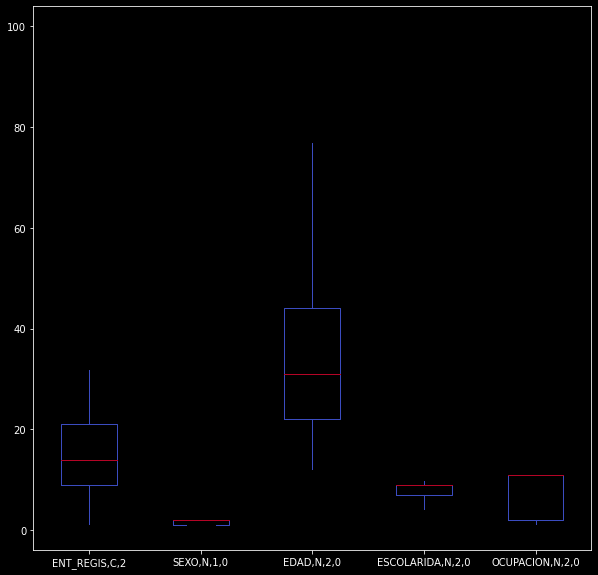

In [16]:
dataframe_seleccion.iloc [:,0:5].plot.box(figsize=(10,10),cmap='coolwarm')
plt.style.use('dark_background')

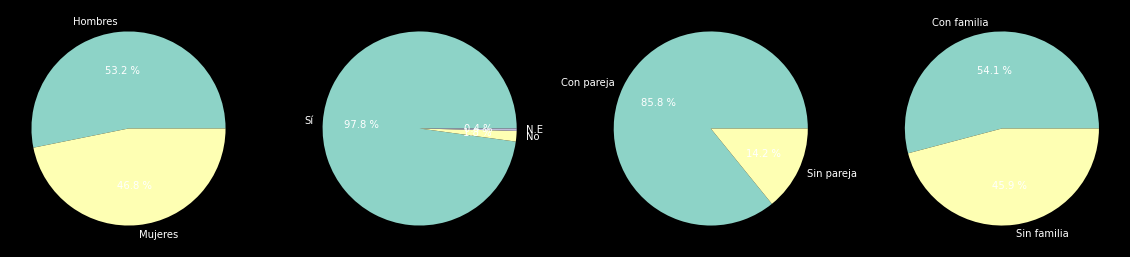

In [21]:
valores_sexo = dataframe_seleccion['SEXO,N,1,0'].value_counts()
sexo = ["Hombres","Mujeres"]
valores_repetir = dataframe_seleccion['REPETIR_VI,N,1,0'].value_counts()
repetir = ["Sí","No", "N.E"]
valores_asistencia_pareja = dataframe_seleccion['PAV_PAREJA,N,1,0'].value_counts()
acompa_nov = ["Con pareja","Sin pareja"]
valores_asistencia_familia = dataframe_seleccion['PAV_FAMILI,N,1,0'].value_counts()
acompa_fam = ["Con familia","Sin familia"]
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.pie(valores_sexo, labels=sexo, autopct="%0.1f %%")
plt.subplot(1,4,2)
plt.pie(valores_repetir, labels=repetir, autopct="%0.1f %%")
plt.subplot(1,4,3)
plt.pie(valores_asistencia_pareja, labels=acompa_nov, autopct="%0.1f %%")
plt.subplot(1,4,4)
plt.pie(valores_asistencia_familia, labels=acompa_fam, autopct="%0.1f %%")
plt.show()

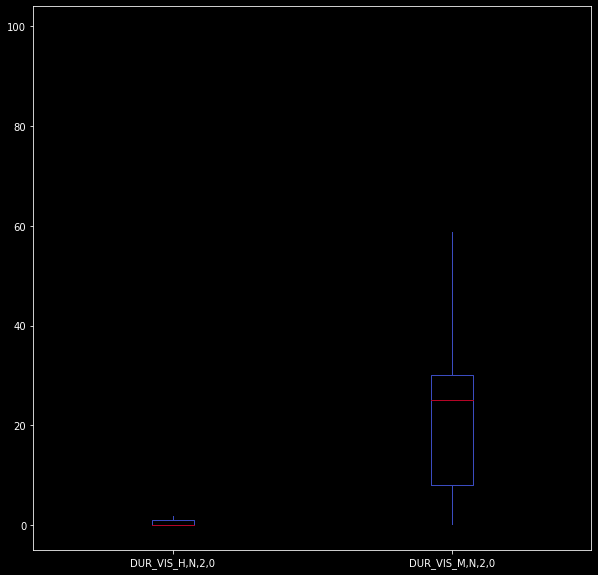

In [11]:
dataframe_seleccion.iloc [:,48:50].plot.box(figsize=(10,10),cmap='coolwarm')
plt.style.use('dark_background')

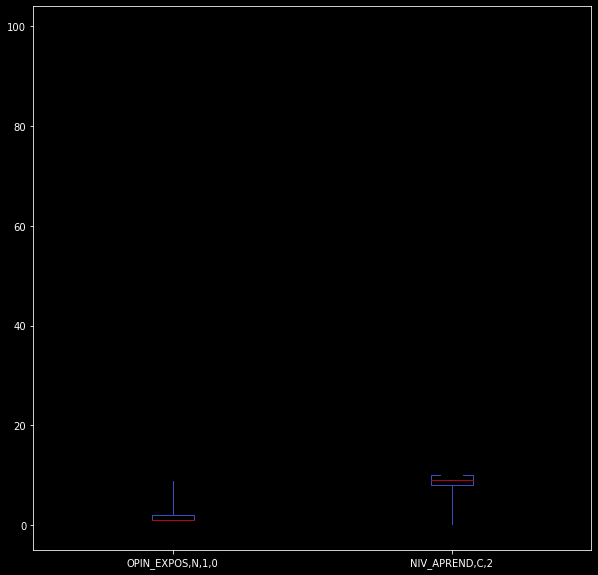

In [12]:
dataframe_seleccion.iloc [:,46:48].plot.box(figsize=(10,10),cmap='coolwarm',whis = 10)
plt.style.use('dark_background')

In [13]:
dataframe_seleccion['PAV_AMIGO,N,1,0'].value_counts()

0    148148
1     37977
Name: PAV_AMIGO,N,1,0, dtype: int64

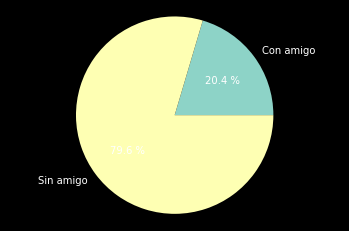

In [14]:
cantidad = [37977, 148148]
acompa_amigo = ["Con amigo","Sin amigo"]
plt.pie(cantidad, labels=acompa_amigo, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

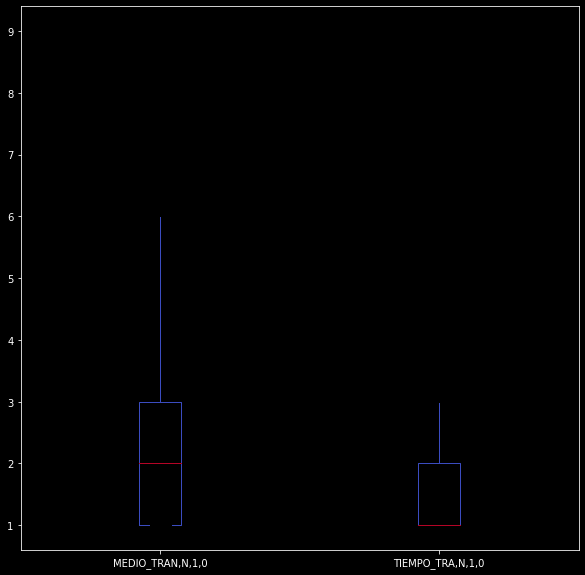

In [15]:
dataframe_seleccion.iloc [:,22:24].plot.box(figsize=(10,10),cmap='coolwarm')
plt.style.use('dark_background')